# Language Detection
See the Dataset on https://www.kaggle.com/datasets/basilb2s/language-detection.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline

import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading the dataset
df = pd.read_csv("Language Detection.csv")
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [4]:
df.describe(include='all')

,Text,Language
count,10337,10337
unique,10267,17
top,Jag är ledsen.,English
freq,3,1385


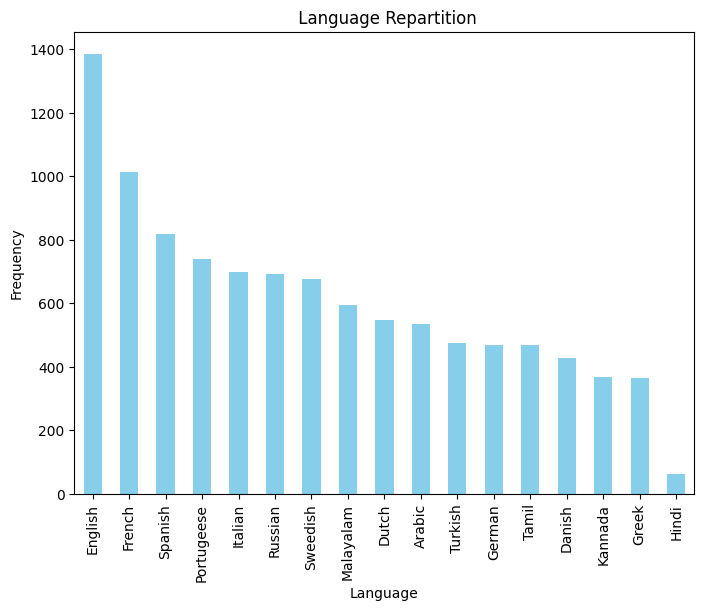

In [5]:
# 
plt.figure(figsize=(8, 6))
df['Language'].value_counts().plot(kind='bar', color='skyblue')
plt.title(' Language Repartition')
plt.xlabel('Language')
plt.ylabel('Frequency')
plt.show()

In [4]:
X = df['Text']
y = df['Language']

In [5]:
# Label encoding
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['Arabic', 'Danish', 'Dutch', 'English', 'French', 'German',
       'Greek', 'Hindi', 'Italian', 'Kannada', 'Malayalam', 'Portugeese',
       'Russian', 'Spanish', 'Sweedish', 'Tamil', 'Turkish'], dtype=object)

In [15]:
y

array([3, 3, 3, ..., 9, 9, 9])

In [24]:
# remove special characters
df_list = []
for text in X:
    text = re.sub(r'[!@#$(),\n"%^*?\:;~`0-9]', ' ', text)
    text = re.sub(r'[\[\]]', '', text)
    text = text.lower()
    df_list.append(text)

X = np.array(df_list)

In [25]:
X[:5]

array([' nature  in the broadest sense  is the natural  physical  material world or universe.',
       ' nature  can refer to the phenomena of the physical world  and also to life in general.',
       'the study of nature is a large  if not the only  part of science.',
       'although humans are part of nature  human activity is often understood as a separate category from other natural phenomena.',
       '    the word nature is borrowed from the old french nature and is derived from the latin word natura  or  essential qualities  innate disposition   and in ancient times  literally meant  birth .'],
      dtype='<U19088')

In [26]:
# divide data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [27]:
# creating bag of words using countvectorizer
cv = CountVectorizer()
cv.fit(X_train)

x_train = cv.transform(X_train).toarray()
x_test  = cv.transform(X_test).toarray()

## Model

In [28]:
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [10]:
y_pred = model.predict(x_test)
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

Accuracy is : 0.9835589941972921
Confusion matrice


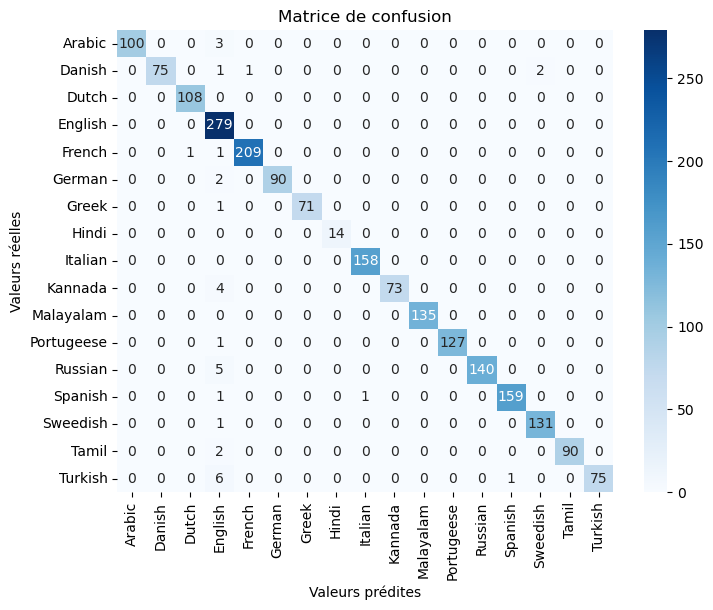

In [31]:
print("Accuracy is :",ac)
print("Confusion matrice")

classes = le.classes_.tolist()
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion')
plt.show()

## Pipeline

In [32]:
pipeline = Pipeline([('vectorizer', cv), ('multinomialNB', model)])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('multinomialNB', MultinomialNB())])

In [33]:
y_pred2 = pipeline.predict(X_test)
ac2 = accuracy_score(y_test, y_pred2)
print("Accuracy is :",ac2)

Accuracy is : 0.980174081237911


## Save and download the model
### create an "app" folder. In this app create another "model" folder

In [34]:
version = "0.1.0"
model_filename = "./app/model/language-detection-model-" + version + ".pkl"
with open(model_filename,'wb') as f:
    pickle.dump(pipeline, f)

### test the downloaded model

In [35]:
with open(model_filename,'rb') as f:
    loaded_model = pickle.load(f)

In [36]:
y_pred = loaded_model.predict(X_test)
ac2 = accuracy_score(y_test, y_pred)
print("Accuracy is :",ac)

Accuracy is : 0.9835589941972921
